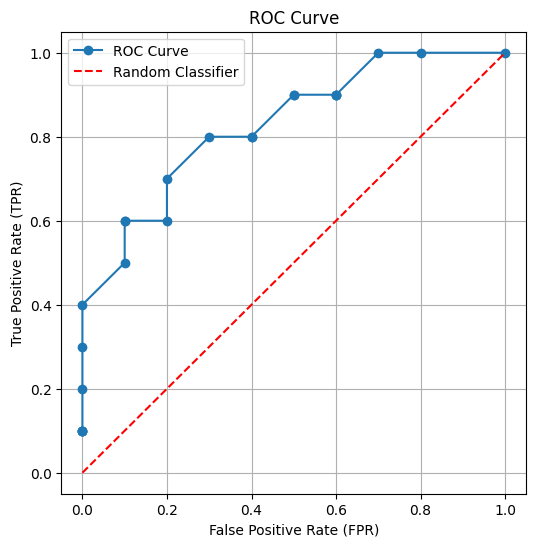

In [ ]:
#Question 1

# Loading the packages
import numpy as np
import matplotlib.pyplot as plt

# Given scores and labels data
scores = np.array([25, 21, 20, 19, 18, 17, 14, 13, 10, 5, 18, 15, 13, 12, 10, 8, 5, 4, 3, 3])
labels = np.array([1]*10 + [0]*10)

# Compute FPR and TPR for all thresholds from 3 to 25
thresholds = np.arange(3, 26)

fpr_values = []
tpr_values = []

for threshold in thresholds:
    preds = (scores >= threshold).astype(int)
    tp = np.sum((preds == 1) & (labels == 1))
    fp = np.sum((preds == 1) & (labels == 0))
    tn = np.sum((preds == 0) & (labels == 0))
    fn = np.sum((preds == 0) & (labels == 1))

    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0

    fpr_values.append(fpr)
    tpr_values.append(tpr)

# Plot ROC Curve
plt.figure(figsize=(6,6))
plt.plot(fpr_values, tpr_values, marker='o', linestyle='-', label="ROC Curve")
plt.plot([0, 1], [0, 1], 'r--', label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Question 2

# Loading the packages
import numpy as np

# Given gene expression values
expression_values = np.array([10, 13, 15, 20])

# MLE estimate for normal distribution parameter theta
theta_mle = np.mean(expression_values)

print("MLE Estimate for θ:", theta_mle)


MLE Estimate for θ: 14.5


Intercept: -4.244909363759932
Coefficient for Age: 0.04180570538977576


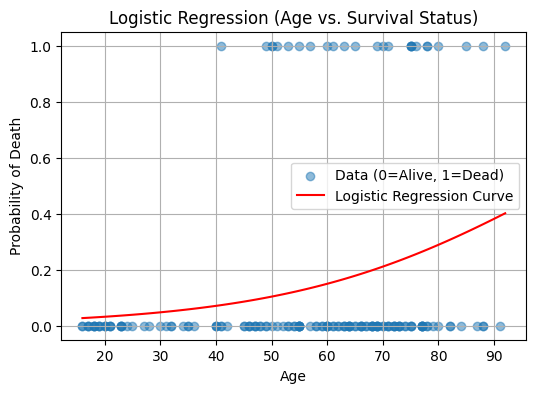

In [ ]:
# Question 3

#Loading the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Loaded the given CSV file
file_path = "patient1.csv"
patient_data = pd.read_csv(file_path)

# Extracted input and output
X = patient_data[['age']].values
y = patient_data['status'].values

# Performed logistic regression
log_regression = LogisticRegression()
log_regression.fit(X, y)

# Get model parameters
intercept = log_regression.intercept_[0]
coefficient = log_regression.coef_[0][0]

# Print the logistic regression model weights
print(f"Intercept: {intercept}")
print(f"Coefficient for Age: {coefficient}")

# Generate age values for plotting the logistic function
age_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)
probabilities = log_regression.predict_proba(age_range)[:, 1]

# Plot logistic function
plt.figure(figsize=(6,4))
plt.scatter(X, y, alpha=0.5, label="Data (0=Alive, 1=Dead)")
plt.plot(age_range, probabilities, color='red', label="Logistic Regression Curve")
plt.xlabel("Age")
plt.ylabel("Probability of Death")
plt.title("Logistic Regression (Age vs. Survival Status)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Question 4

#Loading the packages
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Loaded the immunotherapy dataset
file_path = "Immunotherapy.xlsx"  # Ensure the correct file name

# Read training and test datasets
training_data = pd.read_excel(file_path, sheet_name="Training data set")
testing_data = pd.read_excel(file_path, sheet_name="Test data set")

# Define features and labels for training
X_training = training_data.drop(columns=["Result_of_Treatment"]).values
y_training = training_data["Result_of_Treatment"].values

X_test = testing_data.drop(columns=["Result_of_Treatment"]).values

# Define the neural network model using an explicit Input() layer
model = Sequential([
    Input(shape=(X_training.shape[1],)),
    Dense(16, activation='tanh'),
    Dense(8, activation='tanh'),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_training, y_training, epochs=50, batch_size=8, verbose=1)

# Make predictions on the test dataset
predictions = model.predict(X_test)

# Convert probabilities to binary classification
predicted_classes = (predictions > 0.5).astype(int)

# Display predictions
print("Predicted Treatment Results:", predicted_classes.squeeze())


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1386 - loss: 0.9161      
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2839 - loss: 0.8491 
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3098 - loss: 0.7798 
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3501 - loss: 0.7335 
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4218 - loss: 0.6203 
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4557 - loss: 0.7033 
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4478 - loss: 0.6611 
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4229 - loss: 0.6987 
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6307 - loss: 0.6370 
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5054 - loss: 0.5757 
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5521 - loss: 0.6474 
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accur